In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('data/peaks/uncalibrated_peaks.csv')
df.head()

,detector,element,ROI_Start,ROI_End,Gross,Net,Centroid,FWHM,Known_keV
0,ge,bg,32,35,4093,104,33,--,NaN
1,ge,bg,39,43,21079,12163,40,--,NaN
2,ge,bg,151,154,4259,1189,152,--,NaN
3,ge,bg,165,170,9392,6865,167,2,NaN
4,ge,bg,193,199,23971,-3679,198,--,NaN


# Spectrum Calibration
We've taken readings from both the Ge and Na spectrometers but they come in "channels" that show relative energy levels.  It takes some tweaking of the settings to get the peaks we want to see in the window of the 1024 channels on the MCA software.  We'll then use known energy values for some peaks to try to map these channel values to energy.  Then we can measure the energy levels on other radioactive sources.

## Peak Data for Cs-137
The germanium detector (ge) picked up far more peaks due to its better sensitivity.

For the Na detector the first and last peak represent 32 KeV and 661.6 KeV respectively for a baryon x-ray source and the photopeak of Cs-137.

In [54]:
df[df['element']=='cs137'].sort_values(['detector', 'ROI_Start'])

,detector,element,ROI_Start,ROI_End,Gross,Net,Centroid,FWHM,Known_keV
15,ge,cs137,20,32,3175,821,26,8,32.0
16,ge,cs137,35,41,2043,153,38,--,NaN
17,ge,cs137,42,48,1903,134,45,--,NaN
18,ge,cs137,274,285,2917,234,279,--,NaN
19,ge,cs137,391,403,13418,13265,398,3,661.7
20,ge,cs137,881,886,39,9,882,--,NaN
39,na,cs137,18,30,10062,7447,22,4,32.0
40,na,cs137,41,57,5780,1078,48,8,NaN
41,na,cs137,375,454,34939,33578,410,30,661.7


In [55]:
df[(df['element']=='cs137') & (df['detector']=='na')].sort_values(['detector', 'ROI_Start'])

,detector,element,ROI_Start,ROI_End,Gross,Net,Centroid,FWHM,Known_keV
39,na,cs137,18,30,10062,7447,22,4,32.0
40,na,cs137,41,57,5780,1078,48,8,NaN
41,na,cs137,375,454,34939,33578,410,30,661.7


In [56]:
# Na detector data

# channels
c1 = 22
c2 = 410

# Energy KeV
p1 = 32.0
p2 = 661.7

# Slope
m = (p2 - p1) / (c2 - c1)
print(f'slope m: {m:.3f}')

# Intercept
b = p2 - c2*m
print(f'intercept b: {b:.3f}')

# Setup a simple function to calculate energy from the given channel
def calc_energy(channel):
    return m * channel + b

slope m: 1.623
intercept b: -3.705


In [57]:
df[(df['element']=='co60') & (df['detector']=='na')].sort_values(['detector', 'ROI_Start'])

,detector,element,ROI_Start,ROI_End,Gross,Net,Centroid,FWHM,Known_keV
36,na,co60,41,62,3174,786,50,7,NaN
37,na,co60,678,759,8574,6154,713,35,1173.2
38,na,co60,762,859,6822,6282,808,40,1332.5


## Co-60 Verification
The last two peaks here should be around 1173.2 KeV and 1332.5 KeV for Co-60.  We can see how well a pair of the Cs-137 points does at setting the spectrum, but maybe fitting to four points will do better.

In [58]:
print(f'peak 1: {calc_energy(713):.2f}')
print(f'peak 2: {calc_energy(808):.2f}')

peak 1: 1153.45
peak 2: 1307.63


Very close!  Within 20 KeV for the first, and 25 KeV for the second peak.  At these energies that's just $\approx$2% off the known values.

In [59]:
df[(df['detector']=='na')].sort_values(['detector', 'element', 'ROI_Start'])

,detector,element,ROI_Start,ROI_End,Gross,Net,Centroid,FWHM,Known_keV
28,na,ba133,13,26,53128,44538,21,4,NaN
29,na,ba133,30,35,8803,730,32,--,NaN
30,na,ba133,47,61,65275,38754,52,7,NaN
31,na,ba133,65,83,12568,4330,74,9,NaN
32,na,ba133,160,203,24061,9651,184,19,NaN
33,na,ba133,205,261,53501,36172,227,22,NaN
34,na,ba133,264,315,3335,266,280,14,NaN
35,na,cd109,36,71,1122,815,54,8,NaN
36,na,co60,41,62,3174,786,50,7,NaN
37,na,co60,678,759,8574,6154,713,35,1173.2


Other targets would be Na-22, Ba-133, and the unknown though that's obviously Cs-137 as it has the exact same channel numbers for the centroids.

In [60]:
df.loc[df['detector']=='na', 'energy (KeV)'] = calc_energy(df.loc[(df['detector']=='na'), 'Centroid'])
df[(df['detector']=='na')]

,detector,element,ROI_Start,ROI_End,Gross,Net,Centroid,FWHM,Known_keV,energy (KeV)
28,na,ba133,13,26,53128,44538,21,4,NaN,30.377062
29,na,ba133,30,35,8803,730,32,--,NaN,48.229381
30,na,ba133,47,61,65275,38754,52,7,NaN,80.688144
31,na,ba133,65,83,12568,4330,74,9,NaN,116.392784
32,na,ba133,160,203,24061,9651,184,19,NaN,294.915979
33,na,ba133,205,261,53501,36172,227,22,NaN,364.702320
34,na,ba133,264,315,3335,266,280,14,NaN,450.718041
35,na,cd109,36,71,1122,815,54,8,NaN,83.934021
36,na,co60,41,62,3174,786,50,7,NaN,77.442268
37,na,co60,678,759,8574,6154,713,35,1173.2,1153.450258


## Energy Levels
For these we can compare them against the known values.

### Na-22
- Readings of the peaks of Na-22 come out very well.  The peak at 510.7 KeV is for electron-positron annihilation, so almost on the nose for 511 KeV of those particles.  And the 2nd peak at 1250.6 KeV is very close to the nuclear energy transition at 1270 KeV.

### Cd-109
- There's supposed to be a peak at 88 keV, and we get 83.9, reasonably close.  There's a number of other peaks here but the references I find but they didn't show up clearly in our data from the Na detector.

### Ba-133
- This is one with many peaks, so the Na detector was probably always going to have a tough time at these lower energies.  Some of the peaks line up nicely with the actual data.  30.4 keV vs 30.85 keV, 80.7 keV vs 81 keV.  There's four peaks in the 275-384 keV range and we get 294.9 (vs 276.4), 364.6 (vs 356.02).

### Unknown
- Obviously Cs-137, same exact peaks found as the Cs-137 data that was used to configure it.

In [61]:
df[(df['detector']=='ge')]

,detector,element,ROI_Start,ROI_End,Gross,Net,Centroid,FWHM,Known_keV,energy (KeV)
0,ge,bg,32,35,4093,104,33,--,NaN,NaN
1,ge,bg,39,43,21079,12163,40,--,NaN,NaN
2,ge,bg,151,154,4259,1189,152,--,NaN,NaN
3,ge,bg,165,170,9392,6865,167,2,NaN,NaN
4,ge,bg,193,199,23971,-3679,198,--,NaN,NaN
5,ge,bg,210,219,3391,3110,214,3,NaN,NaN
6,ge,bg,242,248,189,55,244,3,NaN,NaN
7,ge,bg,285,291,155,73,288,4,NaN,NaN
8,ge,bg,345,351,154,13,346,--,NaN,NaN
9,ge,bg,514,520,99,49,516,3,NaN,NaN


In [62]:
c2 = 398
c1 = 26

m = (p2 - p1) / (c2 - c1)
b = p2 - c2*m

In [63]:
df.loc[df['detector']=='ge', 'energy (KeV)'] = calc_energy(df.loc[(df['detector']=='ge'), 'Centroid'])
df[(df['detector']=='ge')]

,detector,element,ROI_Start,ROI_End,Gross,Net,Centroid,FWHM,Known_keV,energy (KeV)
0,ge,bg,32,35,4093,104,33,--,NaN,43.849194
1,ge,bg,39,43,21079,12163,40,--,NaN,55.698387
2,ge,bg,151,154,4259,1189,152,--,NaN,245.285484
3,ge,bg,165,170,9392,6865,167,2,NaN,270.676613
4,ge,bg,193,199,23971,-3679,198,--,NaN,323.151613
5,ge,bg,210,219,3391,3110,214,3,NaN,350.235484
6,ge,bg,242,248,189,55,244,3,NaN,401.017742
7,ge,bg,285,291,155,73,288,4,NaN,475.498387
8,ge,bg,345,351,154,13,346,--,NaN,573.677419
9,ge,bg,514,520,99,49,516,3,NaN,861.443548


In [64]:
calc_energy(801)
calc_energy(704)

1179.6790322580646

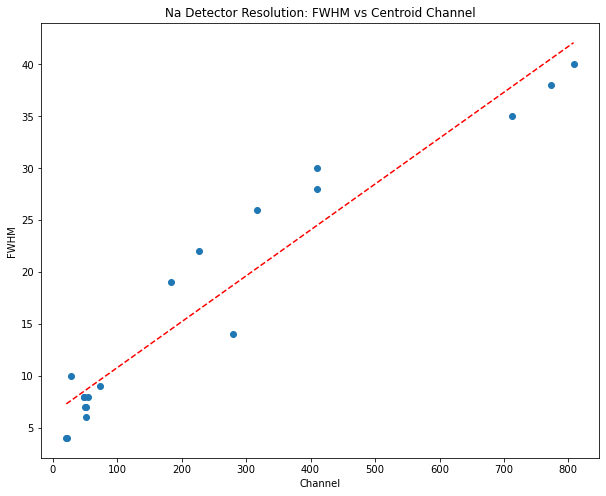

In [65]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(10,8))

fwhm_df =df.loc[(df['detector']=='na') & (df['FWHM'] != '--'), ['Centroid', 'FWHM']].astype(np.int64).sort_values('Centroid')
x = fwhm_df['Centroid'].to_numpy().reshape(-1,1)
y = fwhm_df['FWHM'].to_numpy().reshape(-1,1)

model = LinearRegression().fit(x, y)

y_hat = model.predict(x)

plt.scatter(fwhm_df['Centroid'], fwhm_df['FWHM'])
plt.plot(x, y_hat, linestyle='--', color='r')


plt.title('Na Detector Resolution: FWHM vs Centroid Channel')
plt.xlabel('Channel')
plt.ylabel('FWHM')
plt.show()

In [66]:
print(f'R2 Score: {model.score(x, y):.2f}')

R2 Score: 0.92


In [67]:
fwhm_df.sort_values('Centroid')

,Centroid,FWHM
28,21,4
39,22,4
42,28,10
40,48,8
43,48,8
36,50,7
47,51,6
30,52,7
35,54,8
31,74,9


# Quadratic Fit
We can use three points to fit the data quadratically.